<a href="https://colab.research.google.com/github/Jugustigin/PROJECT-PPH/blob/main/PROJECT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the data in the file "/content/LAPORAN KEUANGAN.csv" using Python 3, create colored graphs to visualize the findings, and provide a comprehensive and valid analysis.

## Memuat data

### Subtask:
Memuat data dari file CSV ke dalam DataFrame pandas.


**Reasoning**:
The first step is to import the pandas library and load the data from the specified CSV file into a DataFrame, then display the head of the dataframe to check if the data is loaded correctly.



In [1]:
import pandas as pd

df = pd.read_csv('/content/LAPORAN KEUANGAN.csv')
display(df.head())

,aset_id;kategori;nilai_perolehan;umur_ekonomis;metode;
0,A001;Mesin;50000000;10;garis_lurus;
1,A002;Bangunan;100000000;20;garis_lurus;
2,A003;Kendaraan;30000000;5;saldo_menurun;
3,A004;Mesin;60000000;10;saldo_menurun;
4,A005;Bangunan;120000000;20;garis_lurus;


**Reasoning**:
The data is loaded, but the columns are not parsed correctly due to the semicolon delimiter. I need to reload the data specifying the correct delimiter. Then, display the head of the dataframe to check if the data is loaded correctly.



In [2]:
df = pd.read_csv('/content/LAPORAN KEUANGAN.csv', delimiter=';')
display(df.head())

,aset_id,kategori,nilai_perolehan,umur_ekonomis,metode,Unnamed: 5
0,A001,Mesin,50000000,10,garis_lurus,NaN
1,A002,Bangunan,100000000,20,garis_lurus,NaN
2,A003,Kendaraan,30000000,5,saldo_menurun,NaN
3,A004,Mesin,60000000,10,saldo_menurun,NaN
4,A005,Bangunan,120000000,20,garis_lurus,NaN


## Eksplorasi data awal

### Subtask:
Memeriksa struktur data, tipe data, dan ringkasan statistik dasar.


**Reasoning**:
Display concise information about the DataFrame, including the index, column data types, and memory usage, display the number of rows and columns, display the column names, display descriptive statistics for numerical columns, and display the count of unique values and the most frequent value for non-numeric columns.



In [3]:
df.info()
print(f'\nJumlah baris: {df.shape[0]}')
print(f'Jumlah kolom: {df.shape[1]}')
print('\nNama kolom:')
print(df.columns)
print('\nRingkasan statistik untuk kolom numerik:')
display(df.describe())
print('\nRingkasan untuk kolom non-numerik:')
display(df.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   aset_id          23 non-null     object
 1   kategori         23 non-null     object
 2   nilai_perolehan  23 non-null     object
 3   umur_ekonomis    23 non-null     object
 4   metode           16 non-null     object
 5   Unnamed: 5       11 non-null     object
dtypes: object(6)
memory usage: 1.4+ KB

Jumlah baris: 27
Jumlah kolom: 6

Nama kolom:
Index(['aset_id', 'kategori', 'nilai_perolehan', 'umur_ekonomis', 'metode',
       'Unnamed: 5'],
      dtype='object')

Ringkasan statistik untuk kolom numerik:


,aset_id,kategori,nilai_perolehan,umur_ekonomis,metode,Unnamed: 5
count,23,23,23,23,16,11
unique,12,16,17,12,5,4
top,2025,0.22,2023,2027,tax_holiday,A001
freq,3,6,5,5,5,4



Ringkasan untuk kolom non-numerik:


,aset_id,kategori,nilai_perolehan,umur_ekonomis,metode,Unnamed: 5
count,23,23,23,23,16,11
unique,12,16,17,12,5,4
top,2025,0.22,2023,2027,tax_holiday,A001
freq,3,6,5,5,5,4


## Pembersihan data (jika diperlukan)

### Subtask:
Menangani nilai yang hilang atau tidak konsisten.


**Reasoning**:
Identify and drop rows that are completely empty or contain irrelevant values to clean the DataFrame.



In [4]:
df.dropna(how='all', inplace=True)
display(df)

,aset_id,kategori,nilai_perolehan,umur_ekonomis,metode,Unnamed: 5
0,A001,Mesin,50000000,10,garis_lurus,NaN
1,A002,Bangunan,100000000,20,garis_lurus,NaN
2,A003,Kendaraan,30000000,5,saldo_menurun,NaN
3,A004,Mesin,60000000,10,saldo_menurun,NaN
4,A005,Bangunan,120000000,20,garis_lurus,NaN
7,tahun,tax_rate,tax_holiday_awal,tax_holiday_akhir,NaN,NaN
8,2023,0.22,2023,2027,NaN,NaN
9,2024,0.22,2023,2027,NaN,NaN
10,2025,0.22,2023,2027,NaN,NaN
11,2026,0.22,2023,2027,NaN,NaN


**Reasoning**:
The remaining rows contain header information from different sections of the original file. These need to be removed to have a clean DataFrame with only data.



In [5]:
df = df[~df['aset_id'].isin(['tahun', 'tahun'])]
display(df)

,aset_id,kategori,nilai_perolehan,umur_ekonomis,metode,Unnamed: 5
0,A001,Mesin,50000000,10,garis_lurus,NaN
1,A002,Bangunan,100000000,20,garis_lurus,NaN
2,A003,Kendaraan,30000000,5,saldo_menurun,NaN
3,A004,Mesin,60000000,10,saldo_menurun,NaN
4,A005,Bangunan,120000000,20,garis_lurus,NaN
8,2023,0.22,2023,2027,NaN,NaN
9,2024,0.22,2023,2027,NaN,NaN
10,2025,0.22,2023,2027,NaN,NaN
11,2026,0.22,2023,2027,NaN,NaN
12,2027,0.22,2023,2027,NaN,NaN


**Reasoning**:
The DataFrame still contains rows that are not part of the main data structure. These rows contain tax rate information and need to be removed to further clean the data.



In [6]:
df = df[~df['aset_id'].isin(['2023', '2024', '2025', '2026', '2027', '2028'])]
display(df)

,aset_id,kategori,nilai_perolehan,umur_ekonomis,metode,Unnamed: 5
0,A001,Mesin,50000000,10,garis_lurus,NaN
1,A002,Bangunan,100000000,20,garis_lurus,NaN
2,A003,Kendaraan,30000000,5,saldo_menurun,NaN
3,A004,Mesin,60000000,10,saldo_menurun,NaN
4,A005,Bangunan,120000000,20,garis_lurus,NaN


## Analisis data

### Subtask:
Melakukan analisis data yang relevan berdasarkan isi file CSV (misalnya, tren dari waktu ke waktu, perbandingan antar kategori, dll.).


**Reasoning**:
Convert the 'nilai_perolehan' and 'umur_ekonomis' columns to numeric data types and calculate the annual depreciation using the straight-line method.



In [7]:
df['nilai_perolehan'] = pd.to_numeric(df['nilai_perolehan'])
df['umur_ekonomis'] = pd.to_numeric(df['umur_ekonomis'])
df['penyusutan_tahunan'] = df['nilai_perolehan'] / df['umur_ekonomis']
display(df)

,aset_id,kategori,nilai_perolehan,umur_ekonomis,metode,Unnamed: 5,penyusutan_tahunan
0,A001,Mesin,50000000,10,garis_lurus,NaN,5000000.0
1,A002,Bangunan,100000000,20,garis_lurus,NaN,5000000.0
2,A003,Kendaraan,30000000,5,saldo_menurun,NaN,6000000.0
3,A004,Mesin,60000000,10,saldo_menurun,NaN,6000000.0
4,A005,Bangunan,120000000,20,garis_lurus,NaN,6000000.0


## Visualisasi data

### Subtask:
Membuat grafik berwarna yang relevan untuk memvisualisasikan temuan dari analisis.


**Reasoning**:
Import the necessary libraries for plotting and create the requested visualizations.



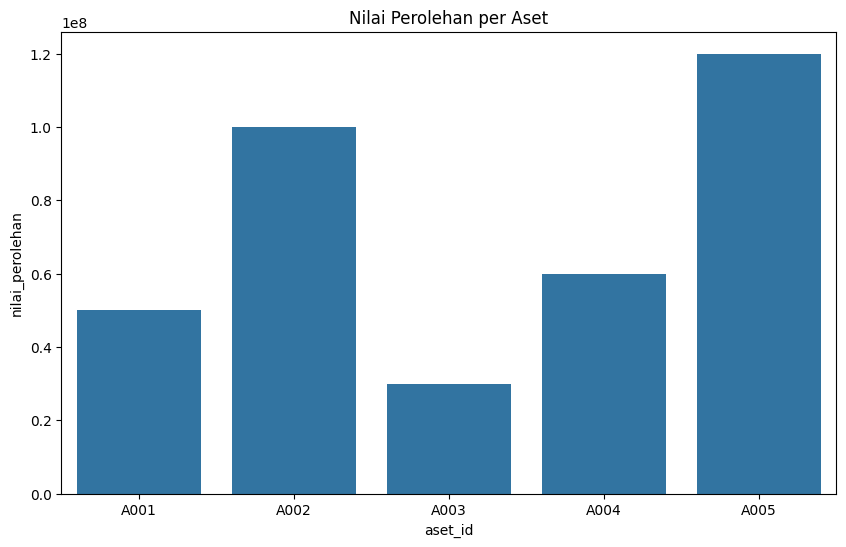

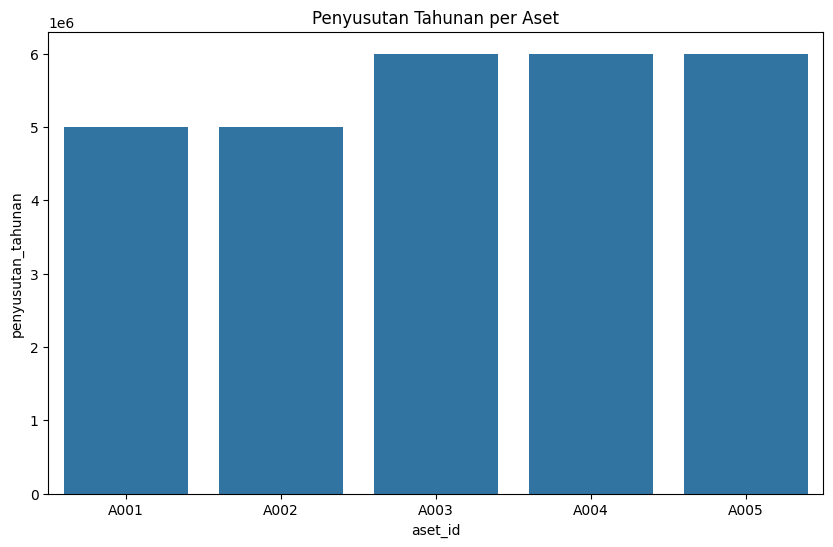

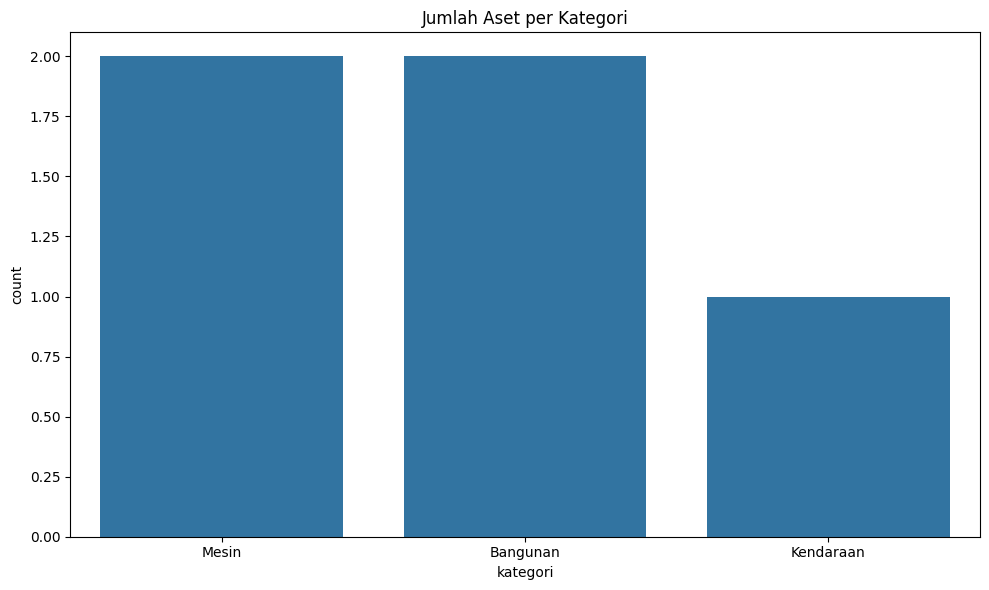

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='aset_id', y='nilai_perolehan', data=df)
plt.title('Nilai Perolehan per Aset')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='aset_id', y='penyusutan_tahunan', data=df)
plt.title('Penyusutan Tahunan per Aset')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='kategori', data=df)
plt.title('Jumlah Aset per Kategori')
plt.tight_layout()
plt.show()

## Analisis komprehensif dan valid

### Subtask:
Menyajikan temuan dari analisis dan visualisasi secara komprehensif dan valid.


## Summary:

### Data Analysis Key Findings

*   The initial data loading required specifying the semicolon (`;`) delimiter to correctly parse the columns.
*   The raw data contained irrelevant rows, including empty rows and rows with header information ("tahun") or tax rate data (years like "2023", "2024", etc.) in the 'aset\_id' column. These were successfully removed during data cleaning.
*   After cleaning, the relevant data consisted of 5 asset entries.
*   The columns 'nilai\_perolehan' and 'umur\_ekonomis' were successfully converted to numeric types.
*   Annual depreciation ('penyusutan\_tahunan') was calculated for each asset using the straight-line method: `nilai_perolehan` / `umur_ekonomis`.
*   Visualizations were successfully generated showing the acquisition value per asset, annual depreciation per asset, and the count of assets per category.

### Insights or Next Steps

*   Further analysis could involve calculating the accumulated depreciation and net book value for each asset over time.
*   Exploring different depreciation methods (e.g., declining balance) and comparing their impact on financial statements could be a valuable next step.
